<a href="https://colab.research.google.com/github/sakship1920/Machine-Learning/blob/main/Project_of_ElectionWinner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
df=pd.read_csv('/content/11-6-Dataset-Predict Election Winner.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [3]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [4]:
df=df.drop(['NAME','AGE','EDUCATION','ASSETS','LIABILITIES','CRIMINAL\nCASES'],axis=1)


In [5]:
df['SYMBOL']=df['SYMBOL'].fillna(df['SYMBOL'].mode()[0])
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])
df['CATEGORY']=df['CATEGORY'].fillna(df['CATEGORY'].mode()[0])

In [6]:
df.head()

,STATE,CONSTITUENCY,WINNER,PARTY,SYMBOL,GENDER,CATEGORY,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,1,BJP,Lotus,MALE,ST,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,0,TRS,Car,MALE,ST,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,0,INC,Hand,MALE,ST,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,0,NOTA,Lotus,MALE,GENERAL,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,1,BJP,Lotus,MALE,SC,644459,2416,646875,33.383823,56.464615,1937690


In [7]:

le=LabelEncoder()
var=['STATE','CONSTITUENCY','PARTY','SYMBOL','GENDER','CATEGORY']
for i in var:
  df[i]=le.fit_transform(df[i])
df.head()

,STATE,CONSTITUENCY,WINNER,PARTY,SYMBOL,GENDER,CATEGORY,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,31,0,1,26,80,1,2,376892,482,377374,25.330684,35.468248,1489790
1,31,0,0,120,32,1,2,318665,149,318814,21.399929,29.964370,1489790
2,31,0,0,46,66,1,2,314057,181,314238,21.092771,29.534285,1489790
3,31,0,0,81,80,1,0,13030,6,13036,0.875023,1.225214,1489790
4,33,1,1,26,80,1,1,644459,2416,646875,33.383823,56.464615,1937690


In [8]:
df.shape

(2263, 13)

In [9]:
df.describe()

,STATE,CONSTITUENCY,WINNER,PARTY,SYMBOL,GENDER,CATEGORY,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2263.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,20.129032,273.209015,0.238179,53.198409,62.943438,0.885992,0.384004,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,11.457304,157.540558,0.426064,30.049487,25.139916,0.317891,0.671940,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,10.000000,134.500000,0.000000,26.000000,49.000000,1.000000,0.000000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,19.000000,277.000000,0.000000,46.000000,66.000000,1.000000,0.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,31.000000,412.000000,0.000000,81.000000,80.000000,1.000000,1.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,35.000000,538.000000,1.000000,132.000000,125.000000,1.000000,2.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [10]:
X=df.drop('WINNER',axis=1)
y=df['WINNER']

<function matplotlib.pyplot.show>

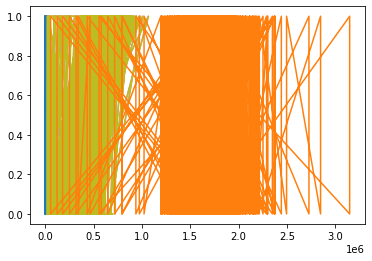

In [11]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.show

Boxplot AxesSubplot(0.125,0.125;0.775x0.755)


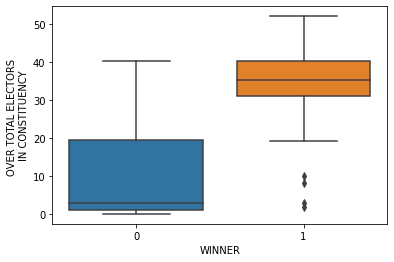

In [12]:
print('Boxplot',sns.boxplot(x='WINNER',y='OVER TOTAL ELECTORS \nIN CONSTITUENCY',data=df))

In [13]:
df.head(3)

,STATE,CONSTITUENCY,WINNER,PARTY,SYMBOL,GENDER,CATEGORY,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,31,0,1,26,80,1,2,376892,482,377374,25.330684,35.468248,1489790
1,31,0,0,120,32,1,2,318665,149,318814,21.399929,29.964370,1489790
2,31,0,0,46,66,1,2,314057,181,314238,21.092771,29.534285,1489790


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 0]
The accuracy from Logistic_regression is: 0.9558498896247241
             Predic

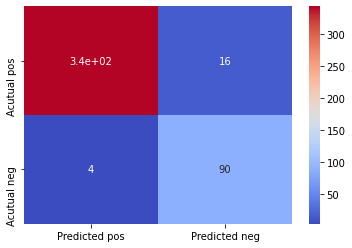

In [16]:
from sklearn.linear_model import LogisticRegression
my_model=LogisticRegression()
result=my_model.fit(X_train,y_train)
predictions = result.predict(X_test)
print(predictions)
print('The accuracy from Logistic_regression is:',accuracy_score(y_test,predictions))
confusion_mat = confusion_matrix(y_test, predictions)
cf=pd.DataFrame(confusion_mat,index=['Acutual pos','Acutual neg'],columns=['Predicted pos','Predicted neg'])
print(cf)
Color_conf_matrix = sns.heatmap(cf, cmap='coolwarm',annot = True)
pred_new=result.predict([[34,1,144,84,1,2,310456,454,311754,21.399992,35.4682544,1489790]])
print(pred_new)


[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0]
The accuracy from DecisionTree is: 0.9403973509933775
             Predicted pos

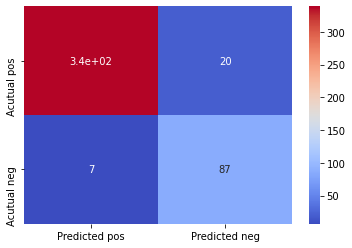

In [17]:
from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier(random_state=0)
result=my_model.fit(X_train,y_train)
predictions = result.predict(X_test)
print(predictions)
print('The accuracy from DecisionTree is:',accuracy_score(y_test,predictions))
confusion_mat = confusion_matrix(y_test, predictions)
cf=pd.DataFrame(confusion_mat,index=['Acutual pos','Acutual neg'],columns=['Predicted pos','Predicted neg'])
print(cf)
Color_conf_matrix = sns.heatmap(cf, cmap='coolwarm',annot = True)
pred_new=result.predict([[34,1,144,84,1,2,310456,454,311754,21.399992,35.4682544,1489790]])
print(pred_new)


[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0]
The accuracy from RandomForest is: 0.9536423841059603
             Predicted pos

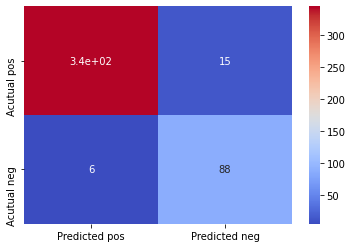

In [18]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
result=my_model.fit(X_train,y_train)
predictions = result.predict(X_test)
print(predictions)
print('The accuracy from RandomForest is:',accuracy_score(y_test,predictions))
confusion_mat = confusion_matrix(y_test, predictions)
cf=pd.DataFrame(confusion_mat,index=['Acutual pos','Acutual neg'],columns=['Predicted pos','Predicted neg'])
print(cf)
Color_conf_matrix = sns.heatmap(cf, cmap='coolwarm',annot = True)
pred_new=result.predict([[34,1,144,84,1,2,310456,454,311754,21.399992,35.4682544,1489790]])
print(pred_new)

[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0]
The accuracy from SVM is: 0.9492273730684326
             Predicted pos  Predict

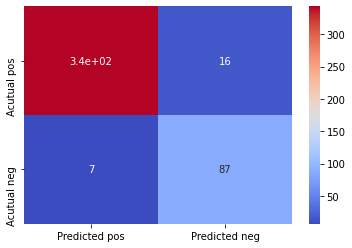

In [19]:
from sklearn.svm import SVC
my_model = SVC(kernel = 'rbf', random_state = 0)
result=my_model.fit(X_train,y_train)
predictions = result.predict(X_test)
print(predictions)
print('The accuracy from SVM is:',accuracy_score(y_test,predictions))
confusion_mat = confusion_matrix(y_test, predictions)
cf=pd.DataFrame(confusion_mat,index=['Acutual pos','Acutual neg'],columns=['Predicted pos','Predicted neg'])
print(cf)
Color_conf_matrix = sns.heatmap(cf, cmap='coolwarm',annot = True)
pred_new=result.predict([[34,1,144,84,1,2,310456,454,311754,21.399992,35.4682544,1489790]])
print(pred_new)

[0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0]
The accuracy from KNeighbors is: 0.9094922737306843
             Predicted pos  

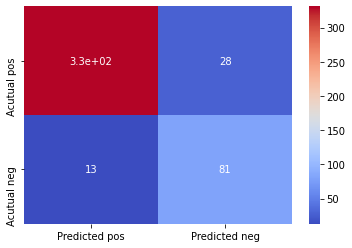

In [20]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=1)
result=my_model.fit(X_train,y_train)
predictions = result.predict(X_test)
print(predictions)
print('The accuracy from KNeighbors is:',accuracy_score(y_test,predictions))
confusion_mat = confusion_matrix(y_test, predictions)
cf=pd.DataFrame(confusion_mat,index=['Acutual pos','Acutual neg'],columns=['Predicted pos','Predicted neg'])
print(cf)
Color_conf_matrix = sns.heatmap(cf, cmap='coolwarm',annot = True)
pred_new=result.predict([[34,1,144,84,1,2,310456,454,311754,21.399992,35.4682544,1489790]])
print(pred_new)